In [1]:
# import package
import rpy2 # mandatory package
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr 
utils = importr('utils') # import the R functions

# display R objects such as data frames in HTML
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

In [2]:
import pandas as pd
import numpy as np

In [3]:
# generate random dataset
df = pd.DataFrame()

df['x'] = np.random.randn(100)
df['y'] = np.random.randn(100)

In [4]:
%%R --input df
head(df)

# %%R : call rpy2 function (cell magic)
# --input : pass Python variable to R

            x          y
0 -0.50627927 -0.6789862
1  0.14576516  0.9911450
2  0.47815673  1.4139108
3 -1.72791088 -1.2947463
4 -0.06352586 -0.1320914
5  0.95639207  0.2611470


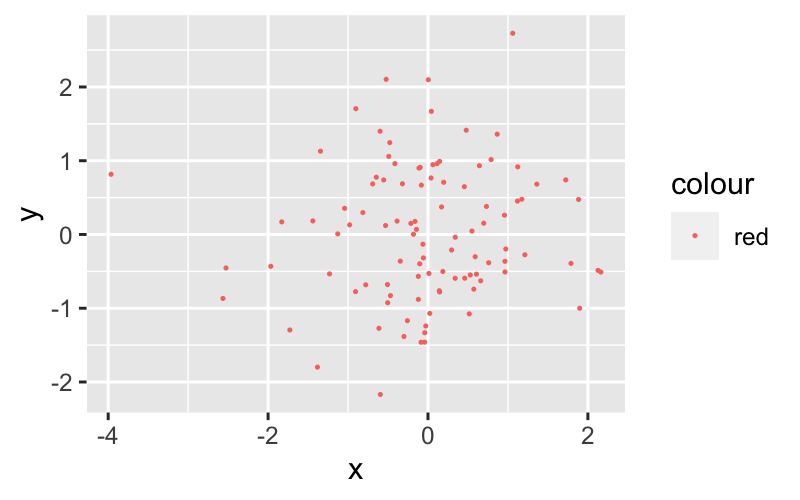

In [5]:
%%R -i df --width 800 --height 500 --units px --res 200
library(ggplot2)
ggplot(df, aes(x = x, y = y, color = 'red')) + geom_point(size = 0.2)

# setting image quality

In [6]:
%%R -i df
library(ggplot2)
ggplot(df, aes(x = x, y = y, color = 'red')) + geom_point()
ggsave(filename='ggsave_testing.pdf')

## using ggsave to save ggplot's image to local drive

Saving 6.67 x 6.67 in image


In [30]:
%%R
# cited: https://stackoverflow.com/questions/13837565/how-to-plot-one-variable-in-ggplot
X = c(500, 400, 350)
library(ggplot2)
qplot(seq_along(data.frame(X)$X), data.frame(X)$X,
        label = X , geom=c('line','text'),
        hjust=0, vjust=-0.4)
ggsave(filename='qplot_testing.pdf')

## using ggsave to save qplot's image to local drive

R[write to console]: Saving 6.67 x 6.67 in image



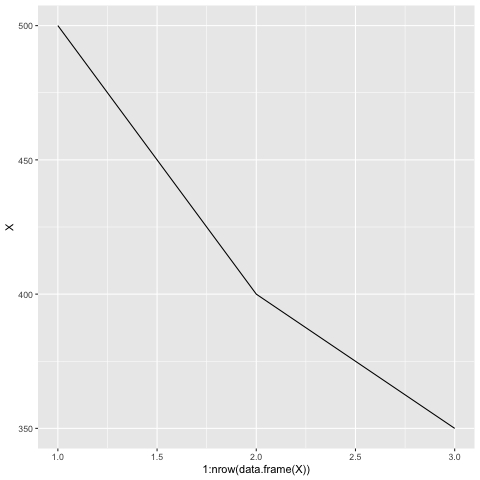

In [7]:
%%R
# Use Data Frame Row Index as X-Variable in ggplot2 Plot in R
# cited: https://statisticsglobe.com/data-frame-index-as-x-variable-ggplot2-plot-r
X = c(500, 400, 350)
library(ggplot2)
ggplot(data = data.frame(X),
        aes(x = 1:nrow(data.frame(X)), y = X)) + 
        geom_line()

### Install R packages

In [31]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# select a mirror for R packages
utils.chooseCRANmirror(ind=66) # select the 66th mirror in the list = Taiwan

# R package names
packnames = ('khroma')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing packages into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



In [36]:
%%R
# use the 'khroma' package in R to obtain a colour-blind friendly palette.
# Where possible, different coloured points will also be represented with different shapes.
library(khroma)
mypal <- colour("okabeito")(8)
mypal <- mypal[c(2:8, 1)]
names(mypal) <- NULL
palette( mypal )

# after then, the figure's colors will be color-blind friendly without setting needed.

### Data import

In [8]:
# create a R object by importing csv file as R method.
df_iris = utils.read_csv('/Users/binhvo/Library/CloudStorage/OneDrive-Personal/Documents_Mac/Ebooks/Python/'
                        'Learning_myself/Python_practice/iris.csv')

In [9]:
df_iris

# as you can see, the output was formatted like HTML format.

,,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,8,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...,...
148,149,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df_iris.colnames

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


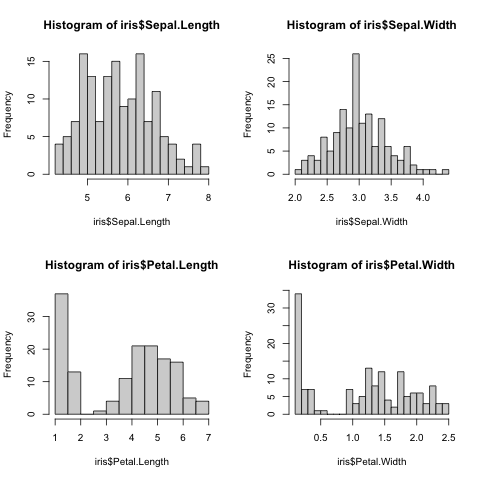

In [37]:
%%R
# par: any plots which we construct will be arranged by
# mfrows: in an array of a rows and b columns
par(mfrow = c(2, 2))
hist(iris$Sepal.Length, breaks = 20)
hist(iris$Sepal.Width, breaks = 20)
hist(iris$Petal.Length, breaks = 20)
hist(iris$Petal.Width, breaks = 20)

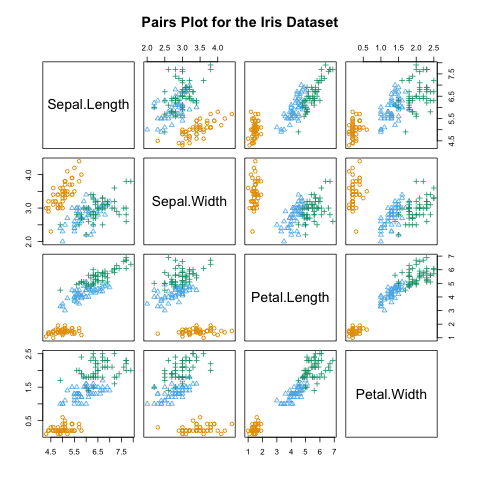

In [38]:
%%R
# iris[,1:4] is data sets with four dimensions.
# It would be nice to try and visualise all (or at least several) of the pair-wise scatter plots of these variables at once. 
# A quick way to do this is to use the pairs function:
pairs(iris[,1:4], col = iris[,5], pch = as.integer(iris[, 5]), 
      main = "Pairs Plot for the Iris Dataset")

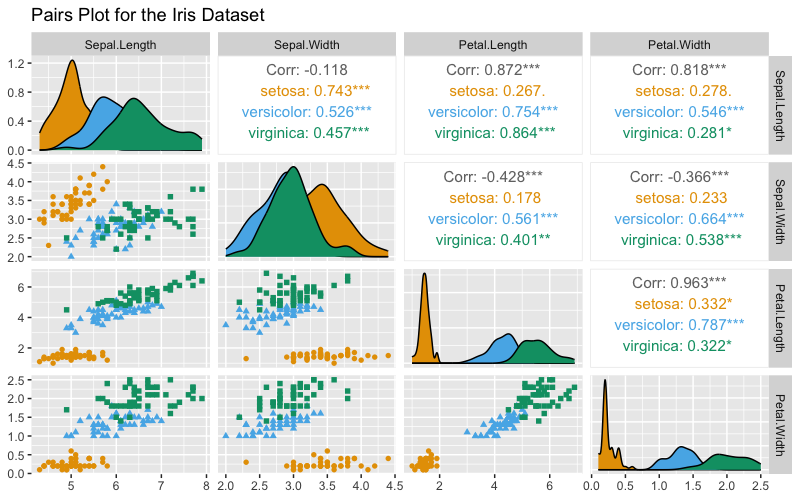

In [57]:
%%R --width 800 --height 500 --units px --res 100
library(GGally)

# ggpairs(data = iris, columns = 1:4, ggplot2::aes(colour=Species, shape = Species))

ggpairs_iris <- ggpairs(data = iris, mapping = aes(colour = Species, shape = Species), columns = 1:4, 
                        title = "Pairs Plot for the Iris Dataset")

for(i in 1:4){
  for(j in 1:4){
    ggpairs_iris[i,j] <- (ggpairs_iris[i,j] + scale_colour_manual(values = mypal) 
                                            + scale_fill_manual(values = mypal)
                          )
  }
}

ggpairs_iris

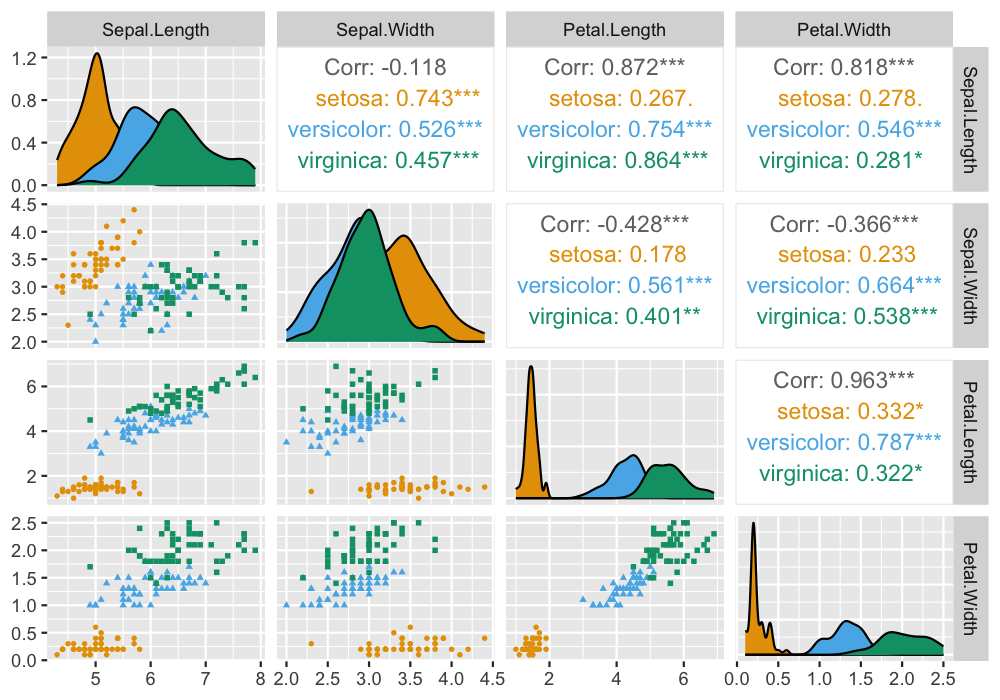

In [94]:
%%R --width 1000 --height 700 --units px --res 150
library(GGally)

ggpairs(data = iris, columns = 1:4, ggplot2::aes(colour=Species, shape = Species),
        lower = list(continuous = wrap("points", size=0.9))) +
        scale_colour_manual(values = mypal) +
        scale_fill_manual(values = mypal)

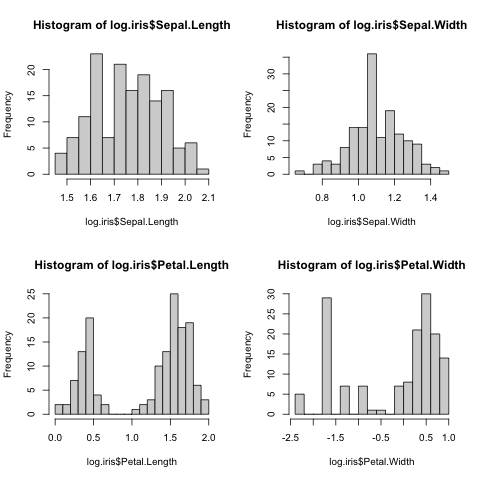

In [14]:
%%R
log.iris <- log(iris[, 1:4])
iris.species <- iris[, 5]
par(mfrow = c(2, 2))
hist(log.iris$Sepal.Length, breaks = 20)
hist(log.iris$Sepal.Width, breaks = 20)
hist(log.iris$Petal.Length, breaks = 20)
hist(log.iris$Petal.Width, breaks = 20)

In [15]:
%%R
ir.pca <- prcomp(log.iris, center = TRUE, scale = TRUE)
print(ir.pca)

Standard deviations (1, .., p=4):
[1] 1.7124583 0.9523797 0.3647029 0.1656840

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3         PC4
Sepal.Length  0.5038236 -0.45499872  0.7088547  0.19147575
Sepal.Width  -0.3023682 -0.88914419 -0.3311628 -0.09125405
Petal.Length  0.5767881 -0.03378802 -0.2192793 -0.78618732
Petal.Width   0.5674952 -0.03545628 -0.5829003  0.58044745


In [16]:
%%R
library(caret)
set.seed(101)
ind <- createDataPartition(iris$Species,p=0.80,list = F)
train <- iris[ind,]
test <- iris[-ind,]

print(dim(train))
print(dim(test))

R[write to console]: Loading required package: lattice



[1] 120   5
[1] 30  5


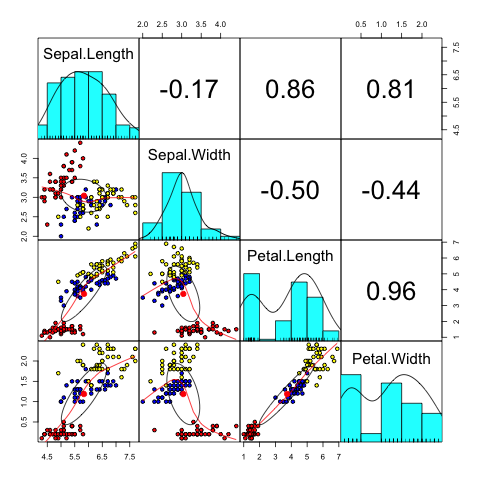

In [25]:
%%R
library(psych)
pairs.panels(train[,-5],gap=0,bg=c("red","blue","yellow")[train$Species],
             pch=21)

In [18]:
%%R
pc <- prcomp(train[,-5],center = T,scale. = T)
pc

Standard deviations (1, .., p=4):
[1] 1.7220854 0.9282791 0.3887008 0.1470767

Rotation (n x k) = (4 x 4):
                    PC1        PC2        PC3        PC4
Sepal.Length  0.5082511 0.42876608 -0.7000992  0.2601953
Sepal.Width  -0.3133284 0.89946468  0.2737239 -0.1336555
Petal.Length  0.5753630 0.03772487  0.1417531 -0.8046368
Petal.Width   0.5589844 0.07549680  0.6440826  0.5167149


In [19]:
%%R
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7221 0.9283 0.38870 0.14708
Proportion of Variance 0.7414 0.2154 0.03777 0.00541
Cumulative Proportion  0.7414 0.9568 0.99459 1.00000


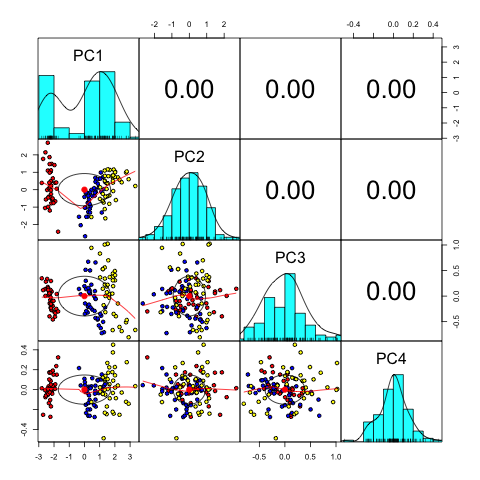

In [20]:
%%R
pairs.panels(pc$x,gap=0,bg=c("red","blue","yellow")[train$Species],
             pch = 21)

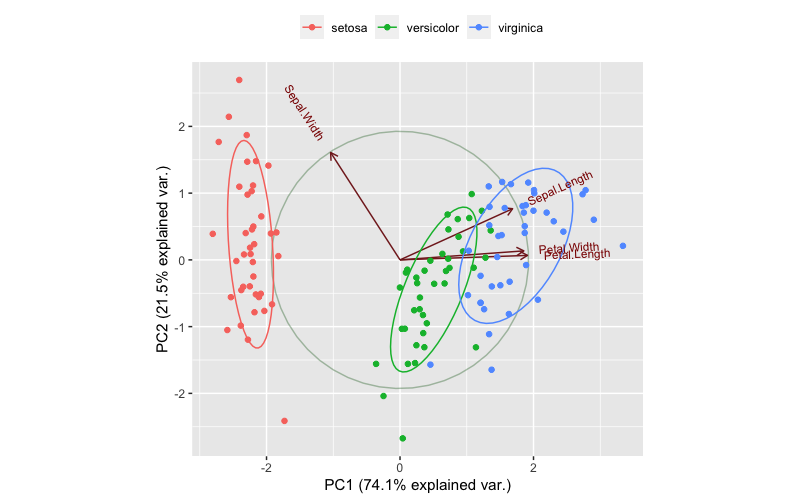

In [29]:
%%R --width 800 --height 500 --units px --res 100
library(devtools)
library(ggbiplot)
ggbiplot(pc, obs.scale = 1, var.scale = 1,
  groups = train$Species, ellipse = TRUE, circle = TRUE,ellipse.prob = 0.68) +
  scale_color_discrete(name = '') +
  theme(legend.direction = 'horizontal', legend.position = 'top')